In [1]:
import sys
sys.path.append("../../src/")
sys.path.append("../../utilities/")
import dataset_class
from dataset_class import dataset
import data_utils
import evaluation_utils
from importlib import reload
dataset_class = reload(dataset_class)
from dataset_class import dataset
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
GM12878_signals_names = ['DNase', 'H3K4me2', 'H3K27ac', 'H2A.Z', 'H3K9me3', 'H3K4me1', 'H3K27me3', 'H3K9ac', 'H3K4me3', 'H3K36me3', 'H3K79me2', 'H4K20me1']
K562_signals_names = ['DNase', 'H3K4me2', 'H3K27ac', 'H2A.Z', 'H3K9me3', 'H3K4me1', 'H3K27me3', 'H3K9ac', 'H3K4me3', 'H3K36me3', 'H3K79me2', 'H4K20me1', 'H3K9me1', 'LaminA_TSA-seq', 'SON_TSA-seq']

In [3]:
GM12878_dataset = dataset('GM12878', 'hg19', 100000, '../../data/GM12878/hg19/Hi-C/GSE63525_GM12878_insitu_primary_30.hic',
                 '../../utilities/juicer_tools_1.22.01.jar', '../../data/GM12878/hg19/Hi-C/res100000',
                 GM12878_signals_names, '../../data/GM12878/hg19/genomic-assays/bin_100000/', 
                  '../../data/GM12878/hg19/res100000_datasets/',
                  '../../data/', '../../utilities/config.json')
GM12878_dataset.load_pos2ind_and_ind2pos_maps('../../data/valid_bins/hg19/GM12878_100000_bins.txt')

In [9]:
GM12878_dataset.read_annotation('../../data/GM12878/hg19/annotations/GSE63525_GM12878_subcompartments.bed', 'SC')

In [25]:
sc = GM12878_dataset.get_chr_annotation(21,'SC')
TADs = pd.read_csv('../../data/GM12878/hg19/annotations/GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt', sep = "\t").iloc[:,:3]
TADs = TADs[TADs['chr1']=='21']

In [26]:
TADs

,chr1,x1,x2
4667,21,28130000,30155000
4668,21,31375000,32460000
4669,21,27635000,28100000
4670,21,34010000,34570000
4671,21,44310000,44545000
...,...,...,...
4758,21,36265000,36420000
4759,21,26540000,26675000
4760,21,16155000,16230000
4761,21,37610000,37695000


In [5]:
oe = GM12878_dataset.get_hic_mat(21,21,'oe')
oe = data_utils.sym_mat(oe.toarray())
ob = GM12878_dataset.get_hic_mat(21,21,'observed')
ob = data_utils.sym_mat(ob.toarray())

observed_chr21_chr21.txt does not exist
dumping observed_chr21_chr21.txt...


In [33]:
TADs = TADs[(TADs['x1']>35000000) & (TADs['x2']<45000000)]
TADs['x1'] = TADs['x1']/100000
TADs['x2'] = TADs['x2']/100000
TADs[['x1','x2']] = TADs[['x1','x2']] - 350

/home/nedooshki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nedooshki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

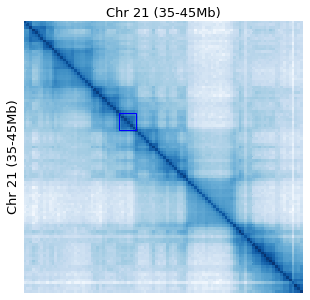

In [93]:
l = 350
u = 450
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(np.arcsinh(ob)[l:u,l:u], cmap = 'Blues', cbar = False)
ax.set(xticks=[],yticks=[])
ax.xaxis.set_label_position('top') 
ax.set_xlabel('Chr 21 (35-45Mb)', fontsize = 13) 
ax.set_ylabel('Chr 21 (35-45Mb)', fontsize = 13)
ax.add_patch(Rectangle((34, 34), 6, 6, edgecolor='blue', fill=False, lw=1))
fig.savefig('results/ob_tad.png', dpi = 300,bbox_inches='tight',facecolor='white', transparent=False)

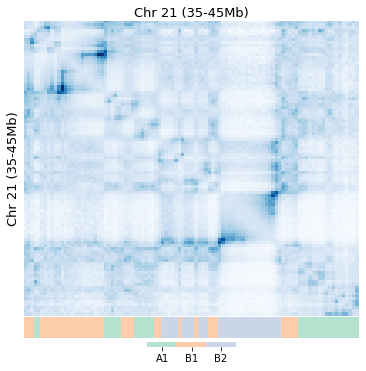

In [92]:
fig, axs = plt.subplots(figsize=(6,6), nrows=2, gridspec_kw={'height_ratios':[1,0.1]})
fig.subplots_adjust(hspace=0.01)
sns.heatmap(oe[l:u,l:u], cmap = 'Blues', ax = axs[0], cbar = False)
axs[0].set(xticks=[],yticks=[])
axs[0].xaxis.set_label_position('top') 
axs[0].set_xlabel('Chr 21 (35-45Mb)', fontsize = 13) 
axs[0].set_ylabel('Chr 21 (35-45Mb)', fontsize = 13)

value_to_int = {j:i for i,j in enumerate(np.unique(sc[l:u]))} # like you did
n = len(value_to_int)     
cmap = sns.color_palette("Pastel2", n) 
sns.heatmap(np.array([value_to_int[l] for l in sc[l:u]]).reshape(1,-1), cmap=cmap, ax = axs[1], cbar_kws={"orientation": "horizontal"}) 
axs[1].set(xticks=[],yticks=[])
# modify colorbar:
colorbar = axs[1].collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys())) 
fig.savefig('results/oe_sc.png', dpi = 300,bbox_inches='tight',facecolor='white', transparent=False)

In [249]:
K562_dataset = dataset('K562', 'hg19', 100000, '../../data/K562/hg19/Hi-C/',
                 '../../utilities/juicer_tools_1.22.01.jar', '../../data/GM12878/hg19/Hi-C/res100000',
                 GM12878_signals_names, '../../data/GM12878/hg19/genomic-assays/bin_100000/', 
                  '../../data/GM12878/hg19/res100000_datasets/',
                  '../../data/', '../../utilities/config.json')
GM12878_dataset.load_pos2ind_and_ind2pos_maps('../../data/valid_bins/hg19/GM12878_100000_bins.txt')

In [122]:
chr_num = 21
signal_num = 0
signal_name = GM12878_signals_names[signal_num]
moran_results = {}

In [250]:
signals = dataset.get_chrom_signals(chr_num).iloc[:,signal_num].values
valid_bins = dataset.get_valid_bins(chr_num)
oe_mat = dataset.get_hic_mat(chr_num,chr_num,'oe')
oe_mat = oe_mat.toarray()[np.ix_(valid_bins,valid_bins)]
dim = oe_mat.shape[0]
oe_mat[np.arange(dim), np.arange(dim)] = 0
oe_mat = data_utils.sym_mat(oe_mat)
ob_mat = dataset.get_hic_mat(chr_num, chr_num,'observed')
ob_mat = ob_mat.toarray()[np.ix_(valid_bins,valid_bins)]
ob_mat[np.arange(dim),np.arange(dim)] = 0
ob_mat = data_utils.sym_mat(ob_mat)
moran_results[signal_name,'oe_moran'] = [evaluation_utils.spatial_correlation(signals, oe_mat)['moran']]
moran_results[signal_name,'ob_moran'] = [evaluation_utils.spatial_correlation(signals, ob_mat)['moran']]
for d_ind,d in enumerate([10000000,1000000]):
        k = int(d/dataset.resolution)
        moran_results[signal_name,'oe_moran'].append(evaluation_utils.spatial_correlation(signals, filter_long_interactions(oe_mat,k))['moran'])
        moran_results[signal_name,'ob_moran'].append(evaluation_utils.spatial_correlation(signals, filter_long_interactions(ob_mat,k))['moran'])

In [229]:
thresholds = [10.0 ** p for p in np.arange(-5,-11,-1)]
fithic_result_df = pd.DataFrame(index=np.arange(3), columns = np.arange(len(thresholds)))
weighted_fithic_result_df = pd.DataFrame(index=np.arange(3), columns = np.arange(len(thresholds)))

for th_ind,th in enumerate(thresholds):
    fithic_mat = dataset.get_fithic_mat(chr_num,chr_num,th)
    fithic_mat = fithic_mat.toarray()[np.ix_(valid_bins,valid_bins)]
    fithic_mat[np.arange(dim), np.arange(dim)] = 0
    fithic_mat = data_utils.sym_mat(fithic_mat)
    weighted_fithic_mat = np.multiply(fithic_mat, oe_mat)
    fithic_moran = evaluation_utils.spatial_correlation(signals, fithic_mat)
    weighted_fithic_moran = evaluation_utils.spatial_correlation(signals, weighted_fithic_mat)
    fithic_result_df.iloc[0,th_ind] = fithic_moran['moran']
    weighted_fithic_result_df.iloc[0,th_ind] = weighted_fithic_moran['moran']
    for d_ind,d in enumerate([10000000,1000000]):
        k = int(d/dataset.resolution)
        fithic_mat = filter_long_interactions(fithic_mat,k)
        weighted_fithic_mat = np.multiply(fithic_mat, oe_mat)
        fithic_moran = evaluation_utils.spatial_correlation(signals, fithic_mat)
        weighted_fithic_moran = evaluation_utils.spatial_correlation(signals, weighted_fithic_mat)
        fithic_result_df.iloc[d_ind+1,th_ind] = fithic_moran['moran']
        weighted_fithic_result_df.iloc[d_ind+1,th_ind] = weighted_fithic_moran['moran']
        
fithic_result_df.index = ['full', '< 10Mb-range', '< 1Mb-range']
fithic_result_df.columns = thresholds
fithic_result_df = fithic_result_df.reset_index().melt(id_vars=['index'], var_name='threshold')
fithic_result_df['type'] = 'fithic_mat'

weighted_fithic_result_df.index = ['full', '< 10Mb-range', '< 1Mb-range']
weighted_fithic_result_df.columns = thresholds
weighted_fithic_result_df = weighted_fithic_result_df.reset_index().melt(id_vars=['index'], var_name='threshold')
weighted_fithic_result_df['type'] = 'weighted_fithic_mat'
    
moran_results[signal_name,'fithic_moran'] = fithic_result_df
moran_results[signal_name,'weighted_fithic_moran'] = weighted_fithic_result_df

../../utilities/evaluation_utils.py:24: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(var)


In [230]:
t = pd.concat([moran_results['DNase','fithic_moran'], moran_results['DNase','weighted_fithic_moran']])
t.reset_index(drop=True, inplace=True)

[None]

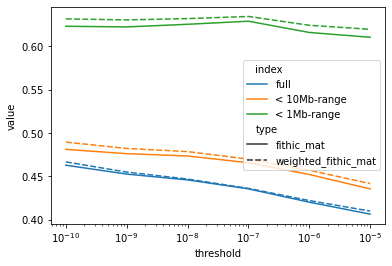

In [231]:
r = sns.lineplot(data = t, x = 'threshold', y = 'value', hue = 'index', style='type')
r.set(xscale='log')

In [268]:
t2 = t[(t['threshold']==0.00001) & (t['type']=='fithic_mat')]
t2 = t2.loc[:,['type', 'index', 'value']]
t2.rename(columns = {'index':'range'}, inplace = True)
t2['type'] = 'fithic'
ranges = t2['range']
t2 = pd.concat([t2,pd.DataFrame({'type': 'OE', 'range': ranges,'value': moran_results['DNase','oe_moran']})])
t2 = pd.concat([t2,pd.DataFrame({'type': 'observed', 'range': ranges,'value': moran_results['DNase','ob_moran']})])

<AxesSubplot:xlabel='type', ylabel='value'>

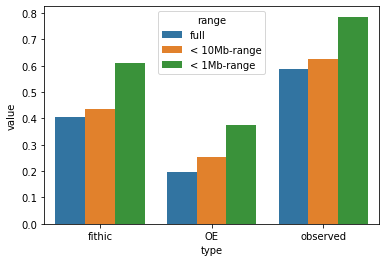

In [271]:
sns.barplot(x="type", y="value", hue="range", data=t2)